In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
import seaborn as sns
iris = sns.load_dataset('iris')

data = torch.tensor(iris[iris.columns[0:4]].values).float()

In [3]:
labels = torch.zeros(len(data),dtype=torch.long)
labels[iris.species=='versicolor'] = 1
labels[iris.species=='virginica'] = 2
labels.unique()

tensor([0, 1, 2])

In [4]:
def createANewModel():
    ANNiris = nn.Sequential(nn.Linear(4,64),
                           nn.ReLU(),
                           nn.Linear(64,64),
                           nn.ReLU(),
                           nn.Linear(64,3))
    
    lossfun = nn.CrossEntropyLoss()
    
    optimizer = torch.optim.SGD(ANNiris.parameters(),lr = 0.01)
    
    return ANNiris,lossfun,optimizer

In [19]:
numepochs = 200

def trainTheModel(trainProp):
    losses = torch.zeros(numepochs)
    trainAcc = []
    testAcc = []
    
    X_train,X_test,y_train,y_test = train_test_split(data,labels,train_size=trainProp)
    for epochi in range(numepochs):
        
        yHat = ANNiris(X_train)
        
        loss = lossfun(yHat,y_train)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        trainAcc.append( 100*torch.mean((torch.argmax(yHat,axis=1) == y_train).float()).item() )
        predlabels = torch.argmax(ANNiris(X_test),axis=1)
        testAcc.append(100*torch.mean((predlabels==y_test).float()).item())
        
    return trainAcc,testAcc

In [20]:
ANNiris,lossfun,optimizer = createANewModel()
trainAcc,testAcc = trainTheModel(0.8)

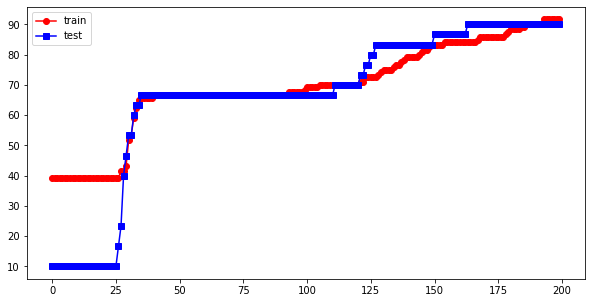

In [21]:
fig = plt.figure(figsize=(10,5))

plt.plot(trainAcc,'ro-')
plt.plot(testAcc,'bs-')
plt.legend(['train','test'])
plt.show();

In [26]:
trainSetSizes = np.linspace(.2,.95,10)
allTrainAcc = np.zeros((len(trainSetSizes),numepochs))
allTestAcc = np.zeros((len(trainSetSizes),numepochs))
for i in range(len(trainSetSize)):
    
    ANNiris,lossfun,optimizer = createANewModel()
    trainAcc,testAcc = trainTheModel(trainSetSizes[i])
    
    allTrainAcc[i,:] = trainAcc
    allTestAcc[i,:] = testAcc

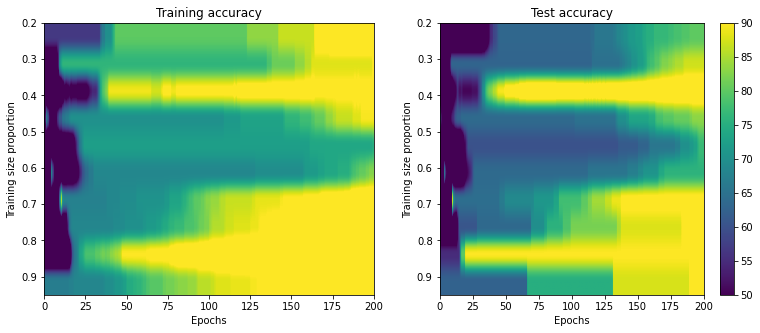

In [27]:
fig,ax = plt.subplots(1,2,figsize=(13,5))

ax[0].imshow(allTrainAcc,aspect='auto',
             vmin=50,vmax=90, extent=[0,numepochs,trainSetSizes[-1],trainSetSizes[0]])
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Training size proportion')
ax[0].set_title('Training accuracy')

p = ax[1].imshow(allTestAcc,aspect='auto',
             vmin=50,vmax=90, extent=[0,numepochs,trainSetSizes[-1],trainSetSizes[0]])
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Training size proportion')
ax[1].set_title('Test accuracy')
fig.colorbar(p,ax=ax[1])

plt.show()